### Module 5.2 through 5.6 Exercises
Analysis of PyBer city and ride data

In [1]:
# Magic lines and dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import dataframe_image as dfi

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read city data file and cast into dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [5]:
# Read ride data file and cast into dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [6]:
# Inspect city data using count, isnull+sum, unique, etc.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
city_data_df.value_counts(["type"])

type    
Urban       66
Suburban    36
Rural       18
dtype: int64

In [11]:
sum(city_data_df["type"]=="Urban")

66

In [12]:
# Inspect ride data using count, isnull+sum, unique, etc.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
# Merge data frames
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=['city', 'city'])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


#### AIM 1: Create a scatter plot of average fare for each city vs total number of rides
- plot as bubbles with size representing number of drivers
- color code bubbles by type of city
- legend for colored bubbles
- note on side about bubble size
- grid and labels

In [18]:
# Create separate dataframes for each type of city.
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [19]:
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [20]:
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [21]:
# Count number of rides for cities - urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [22]:
# Count number of rides for cities - suburban and rural cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [23]:
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [25]:
# Calculate average fare for each city, each city type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [26]:
# Get Average number of drivers for cities
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [33]:
# This should match driver counts from the original city data df
urban_driver_count2 = city_data_df.loc[city_data_df["type"]=="Urban",["city","driver_count"]]
urban_driver_count2

,city,driver_count
0,Richardfort,38
1,Williamsstad,59
2,Port Angela,67
3,Rodneyfort,34
4,West Robert,39
...,...,...
61,Amandaburgh,12
62,Williamsview,46
63,New Jacobville,50
64,Port Samanthamouth,57


In [34]:
# Get driver counts for rural and suburban cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

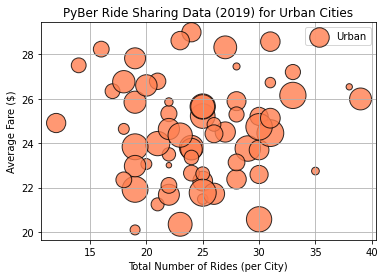

In [40]:
# Creat bubble charts for each type of city
# Urban
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count, color="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
plt.title("PyBer Ride Sharing Data (2019) for Urban Cities")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

plt.show()

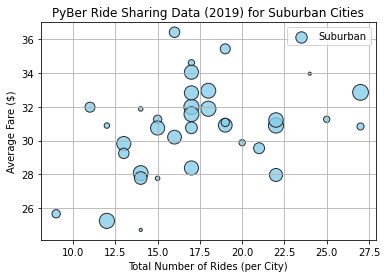

In [42]:
# Suburban
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count, color="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride Sharing Data (2019) for Suburban Cities")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

plt.show()

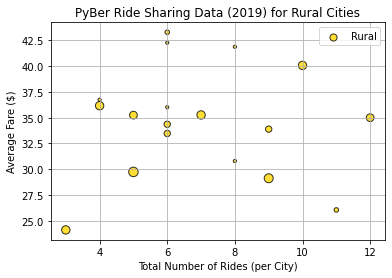

In [44]:
# Rural
plt.scatter(rural_ride_count,rural_avg_fare,
            s=10*rural_driver_count, 
            color="gold", edgecolor="black", linewidths=1, alpha=0.8, 
            label="Rural")
plt.title("PyBer Ride Sharing Data (2019) for Rural Cities")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

plt.show()

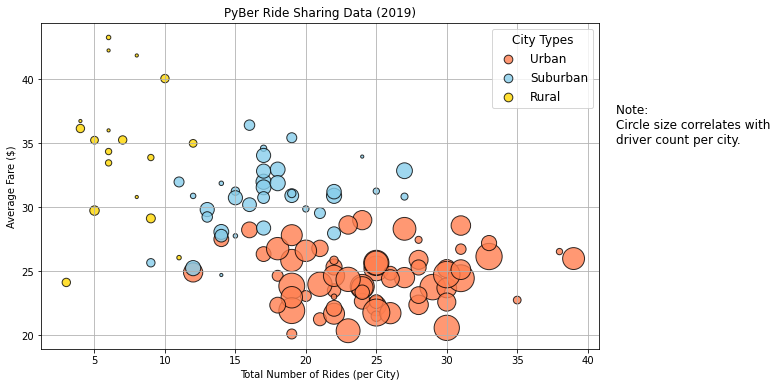

In [59]:
# Combine all 3 bubble plots
plt.subplots(figsize=(10,6))
# Urban
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count, 
            color="coral", edgecolor="black", linewidths=1, 
            alpha=0.8, label="Urban")
# Suburban
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count, 
            color="skyblue", edgecolor="black", linewidths=1, alpha=0.8, 
            label="Suburban")
# Rural
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count, 
            color="gold", edgecolor="black", linewidths=1, alpha=0.8, 
            label="Rural")
# Annotations
plt.title("PyBer Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Specify legend
lgnd=plt.legend(fontsize="12", mode="Expanded",
               scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Note about bubble sizes
plt.text(42,35, "Note: \nCircle size correlates with \ndriver count per city.", fontsize="12")

# Save Figure
plt.savefig("Analysis/Fig1.png")

plt.show()